In [2]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-08-04 20:02:05--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.1’

names.txt.1         100%[===================>] 222.80K  --.-KB/s    in 0.04s   

2024-08-04 20:02:05 (5.48 MB/s) - ‘names.txt.1’ saved [228145/228145]



In [4]:
import torch.nn.functional as F
import torch

device = torch.device('mps')

words = open('names.txt', 'r').read().splitlines()
words[:10]
N = torch.zeros((27, 27), dtype=torch.int32)
chars = ['.'] + (sorted(list(set(''.join(words)))))
stoi = {s: i for i, s in enumerate(chars)}
itos = {i: s for s, i in stoi.items()}

In [10]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

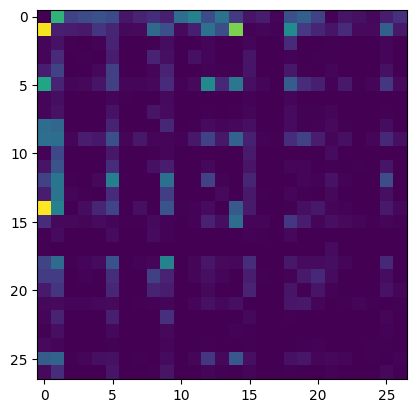

In [8]:
import matplotlib.pyplot as plt
%matplotlib  inline

plt.imshow(N)

In [83]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [98]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [99]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    ix = 0
    out = []
    while True:
        p = P[ix]
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [103]:
# Likelihood = product of ALL probabilities on the training set.
# But this is tiny.
# So they work with log likelihood. 
# Log of products is sum of logs.
# We want probability -> 1. 
# So we take the negative log likelihood. 

nll = 0.0
avg_nll = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        n += 1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        p = P[ix1, ix2]
        logp = torch.log(p)
        nll -= logp
        #print(f"{ch1}{ch2}: {P[ix1, ix2]:.4f} {logp:.4f}")
avg_nll = nll / n
print(f"{nll=}")
print(f"{avg_nll=}")

nll=tensor(559938.8125)
avg_nll=tensor(2.4543)


## nn approach

In [13]:
# train/test split on bigrams

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

# can't plug integer indices into neural nets.
# the neural net will give us one-hot probabilities on the outputs. 
# encode the inputs like that, as floats.
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [118]:
W = torch.randn((27,27))
xenc @ W

tensor([[-0.1028,  0.7623,  0.2024,  0.0711, -0.8137,  0.4077,  2.1116, -0.5089,
         -0.3318, -1.1819,  0.5963,  0.6191, -1.5235, -1.0351,  1.3587,  0.8343,
          1.1642, -0.0277, -0.6163, -0.7182, -2.2452, -1.0511, -0.7420,  0.5654,
          0.1090, -0.7727, -0.2026],
        [-0.8037,  2.2078,  2.5926, -0.0237, -1.6223, -0.7206, -0.5024, -0.6034,
         -1.2975,  0.0232, -0.3389, -0.1924,  0.0110, -0.1196, -0.6577,  0.6314,
         -0.7795, -0.0582, -0.1258, -1.1945, -0.3051, -0.6690,  0.5202, -1.4686,
          0.1563,  1.3229, -0.4395],
        [ 0.7278,  1.4760, -0.2153,  0.7162, -1.6537, -0.1023, -0.1715,  0.2846,
         -1.7208,  0.4465, -0.4684, -0.1269, -0.8256,  1.0582, -1.6515, -0.8425,
         -2.1360, -1.2853, -0.7218, -0.7105,  0.0186, -0.5569, -0.1143, -1.1410,
          1.0940, -1.3196,  0.3603],
        [ 0.7278,  1.4760, -0.2153,  0.7162, -1.6537, -0.1023, -0.1715,  0.2846,
         -1.7208,  0.4465, -0.4684, -0.1269, -0.8256,  1.0582, -1.6515, -0.8425

In [10]:
# NN outputs are centered around zero. how do we translate them into a probability?
# interpret the outputs as "log counts". log counts are "logits". equivalent to the N matrix
# from before.
logits = xenc @ W

# the following is softmax:
# softmax == "log counts" to "probs"
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

NameError: name 'W' is not defined

In [14]:
xs, ys = [], []

for w in words[:200]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)#.to(device)
ys = torch.tensor(ys)#.to(device)

num = xs.nelement()
print('n examples = ', num)

# randomly initialize 27 neurons, each on 27 dim
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)#.to(device)

n examples =  1390


In [ ]:


sdkfjsldkjflskdjflksdjlkjj
kjjjjjj

In [ ]:
dd

In [13]:
for k in range(1000):
    # fwd
    xenc = F.one_hot(xs, num_classes=27).float() # input
    logits = xenc @ W # prdcit log-counts
    counts = logits.exp() # convt to counts
    probs = counts / counts.sum(1, keepdims=True)
    
    loss = -probs[:, ys].log().mean()

    if k % 100 == 0:
        print(loss.item())

    # back
    W.grad = None
    loss.backward()
    W.data += -90 * W.grad

3.0677237510681152
2.7266533374786377
2.7242002487182617
2.723475217819214
2.7231571674346924
2.7229864597320557
2.7228844165802
2.7228198051452637
2.7227768898010254
2.722747325897217


In [ ]:
W.grad = None
loss.backward()
W.data += -0.1 * W.grad